Exploring the output files generated by the Salish Sea Atlantis Model

In [49]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

## Investigating contaminant movement in output files of various simulations

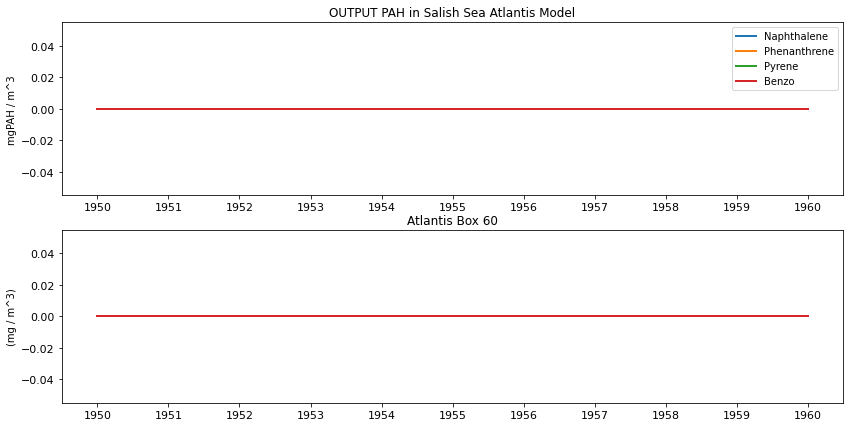

In [12]:
# Contaminant dispersal
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TP_1951_09SS_Jun6/outputSalishSea.nc"
data = xr.open_dataset(str(data_file), decode_cf=True)

naph = np.ma.filled(data.variables["Naphthalene"], np.nan) # [t,b,z]
phenan = np.ma.filled(data.variables["Phenanthrene"], np.nan)
pyr = np.ma.filled(data.variables["Pyrene"], np.nan)
benzo = np.ma.filled(data.variables["Benzo"], np.nan)
time = np.ma.filled(data.variables['t'], np.nan)

naph2 = naph.sum(axis=1)    #  [t,b]
phenan2 = phenan.sum(axis=1)
pyr2 = pyr.sum(axis=1)
benzo2 = benzo.sum(axis=1)


fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(time, naph2.sum(axis=1), time, phenan2.sum(axis=1), time, pyr2.sum(axis=1), time, benzo2.sum(axis=1), linewidth = 2)
ax[0].set_title('OUTPUT PAH in Salish Sea Atlantis Model', fontsize = 12)
ax[0].set_ylabel('mgPAH / m^3')
ax[0].tick_params(labelsize=11)
ax[0].legend(('Naphthalene', 'Phenanthrene', 'Pyrene', 'Benzo'))

box = 60

naph_b = np.ma.filled(data.variables["Naphthalene"][:,box], np.nan) # [t,b,z]
phenan_b = np.ma.filled(data.variables["Phenanthrene"][:,box], np.nan)
pyr_b = np.ma.filled(data.variables["Pyrene"][:,box], np.nan)
benzo_b = np.ma.filled(data.variables["Benzo"][:,box], np.nan)

ax[1].plot(time, naph_b.sum(axis=1), time, phenan_b.sum(axis=1), time, pyr_b.sum(axis=1), time, benzo_b.sum(axis=1), linewidth = 2)
ax[1].set_title('Atlantis Box ' + str(box), fontsize = 12)
ax[1].set_ylabel('(mg / m^3)')
ax[1].tick_params(labelsize=11)

In [ ]:
# Contaminant dispersal
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TurnPoint_20200119_day6release/outputSalishSea.nc"
data = xr.open_dataset(str(data_file), decode_cf=True)

naph = np.ma.filled(data.variables["Naphthalene"], np.nan) # [t,b,z]
phenan = np.ma.filled(data.variables["Phenanthrene"], np.nan)
pyr = np.ma.filled(data.variables["Pyrene"], np.nan)
benzo = np.ma.filled(data.variables["Benzo"], np.nan)
time = np.ma.filled(data.variables['t'], np.nan)

naph2 = naph.sum(axis=1)    #  [t,b]
phenan2 = phenan.sum(axis=1)
pyr2 = pyr.sum(axis=1)
benzo2 = benzo.sum(axis=1)


fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(time, naph2.sum(axis=1), time, phenan2.sum(axis=1), time, pyr2.sum(axis=1), time, benzo2.sum(axis=1), linewidth = 2)
ax[0].set_title('OUTPUT PAH in Salish Sea Atlantis Model', fontsize = 12)
ax[0].set_ylabel('mgPAH / m^3')
ax[0].tick_params(labelsize=11)
ax[0].legend(('Naphthalene', 'Phenanthrene', 'Pyrene', 'Benzo'))

box = 60

naph_b = np.ma.filled(data.variables["Naphthalene"][:,box], np.nan) # [t,b,z]
phenan_b = np.ma.filled(data.variables["Phenanthrene"][:,box], np.nan)
pyr_b = np.ma.filled(data.variables["Pyrene"][:,box], np.nan)
benzo_b = np.ma.filled(data.variables["Benzo"][:,box], np.nan)

ax[1].plot(time, naph_b.sum(axis=1), time, phenan_b.sum(axis=1), time, pyr_b.sum(axis=1), time, benzo_b.sum(axis=1), linewidth = 2)
ax[1].set_title('Atlantis Box ' + str(box), fontsize = 12)
ax[1].set_ylabel('(mg / m^3)')
ax[1].tick_params(labelsize=11)

In [ ]:
# Contaminant dispersal
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/contam_test1/outputSalishSea.nc"
data = xr.open_dataset(str(data_file), decode_cf=True)

naph = np.ma.filled(data.variables["Naphthalene"], np.nan) # [t,b,z]
phenan = np.ma.filled(data.variables["Phenanthrene"], np.nan)
pyr = np.ma.filled(data.variables["Pyrene"], np.nan)
benzo = np.ma.filled(data.variables["Benzo"], np.nan)
time = np.ma.filled(data.variables['t'], np.nan)

naph2 = naph.sum(axis=1)    #  [t,b]
phenan2 = phenan.sum(axis=1)
pyr2 = pyr.sum(axis=1)
benzo2 = benzo.sum(axis=1)


fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(time, naph2.sum(axis=1), time, phenan2.sum(axis=1), time, pyr2.sum(axis=1), time, benzo2.sum(axis=1), linewidth = 2)
ax[0].set_title('OUTPUT PAH in Salish Sea Atlantis Model', fontsize = 12)
ax[0].set_ylabel('mgPAH / m^3')
ax[0].tick_params(labelsize=11)
ax[0].legend(('Naphthalene', 'Phenanthrene', 'Pyrene', 'Benzo'))

box = 90

naph_b = np.ma.filled(data.variables["Naphthalene"][:,box], np.nan) # [t,b,z]
phenan_b = np.ma.filled(data.variables["Phenanthrene"][:,box], np.nan)
pyr_b = np.ma.filled(data.variables["Pyrene"][:,box], np.nan)
benzo_b = np.ma.filled(data.variables["Benzo"][:,box], np.nan)

ax[1].plot(time, naph_b.sum(axis=1), time, phenan_b.sum(axis=1), time, pyr_b.sum(axis=1), time, benzo_b.sum(axis=1), linewidth = 2)
ax[1].set_title('Atlantis Box ' + str(box), fontsize = 12)
ax[1].set_ylabel('(mg / m^3)')
ax[1].tick_params(labelsize=11)

## Ecological impact of one contaminant simulation vs a control

In [2]:
# Read in salish sea atlantis control files.
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control_00SS_Jun1_90y/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)

# Plotting time
control_time = np.ma.filled(control.variables['t'], np.nan)

In [10]:
# Read in salish sea atlantis contaminant output files.
#data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TurnPoint_20200119_90y/outputSalishSea.nc"
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TP_1951_09SS_Jun6/outputSalishSea.nc"
data = xr.open_dataset(str(data_file), decode_cf=True)

# Plotting time
oiled_time = np.ma.filled(data.variables['t'], np.nan)

# Plot variables
label_size = 11
font_size = 12
line_width = 2

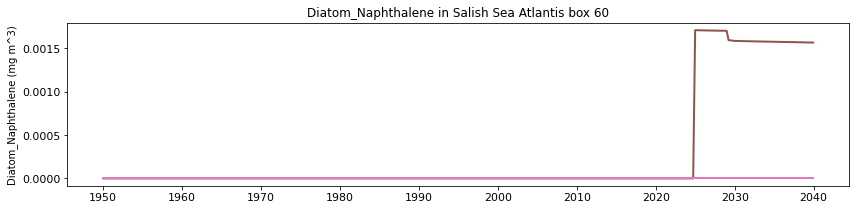

In [6]:
#Other Parameters

parameter = "Diatom_Naphthalene" #Phenanthrene Pyrene Benzo
box = 60

param_oiled = np.ma.filled(data.variables[parameter][:,box], np.nan)
#param_control = np.ma.filled(control.variables[parameter][:,box], np.nan)

fig, ax = plt.subplots(figsize = (14,3))
ax.plot(oiled_time, param_oiled, linewidth = 2) #control_time, param_control, 
ax.set_title(parameter + ' in Salish Sea Atlantis box ' + str(box), fontsize = font_size)
ax.set_ylabel(parameter +' (mg m^3)')
ax.tick_params(labelsize=label_size)
#ax.legend(('with oil', 'without oil'), loc='lower left')

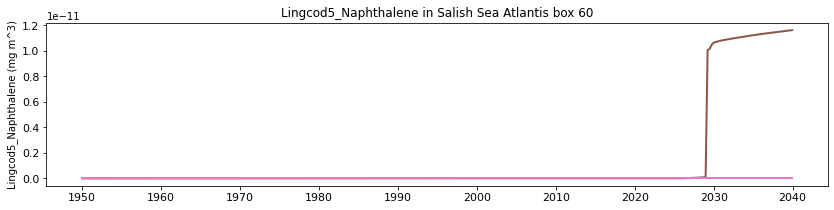

In [7]:
#Other Parameters

parameter = "Lingcod5_Naphthalene" #Phenanthrene Pyrene Benzo
box = 60

param_oiled = np.ma.filled(data.variables[parameter][:,box], np.nan)
#param_control = np.ma.filled(control.variables[parameter][:,box], np.nan)

fig, ax = plt.subplots(figsize = (14,3))
ax.plot(oiled_time, param_oiled, linewidth = 2) #control_time, param_control, 
ax.set_title(parameter + ' in Salish Sea Atlantis box ' + str(box), fontsize = font_size)
ax.set_ylabel(parameter +' (mg m^3)')
ax.tick_params(labelsize=label_size)
#ax.legend(('with oil', 'without oil'), loc='lower left')

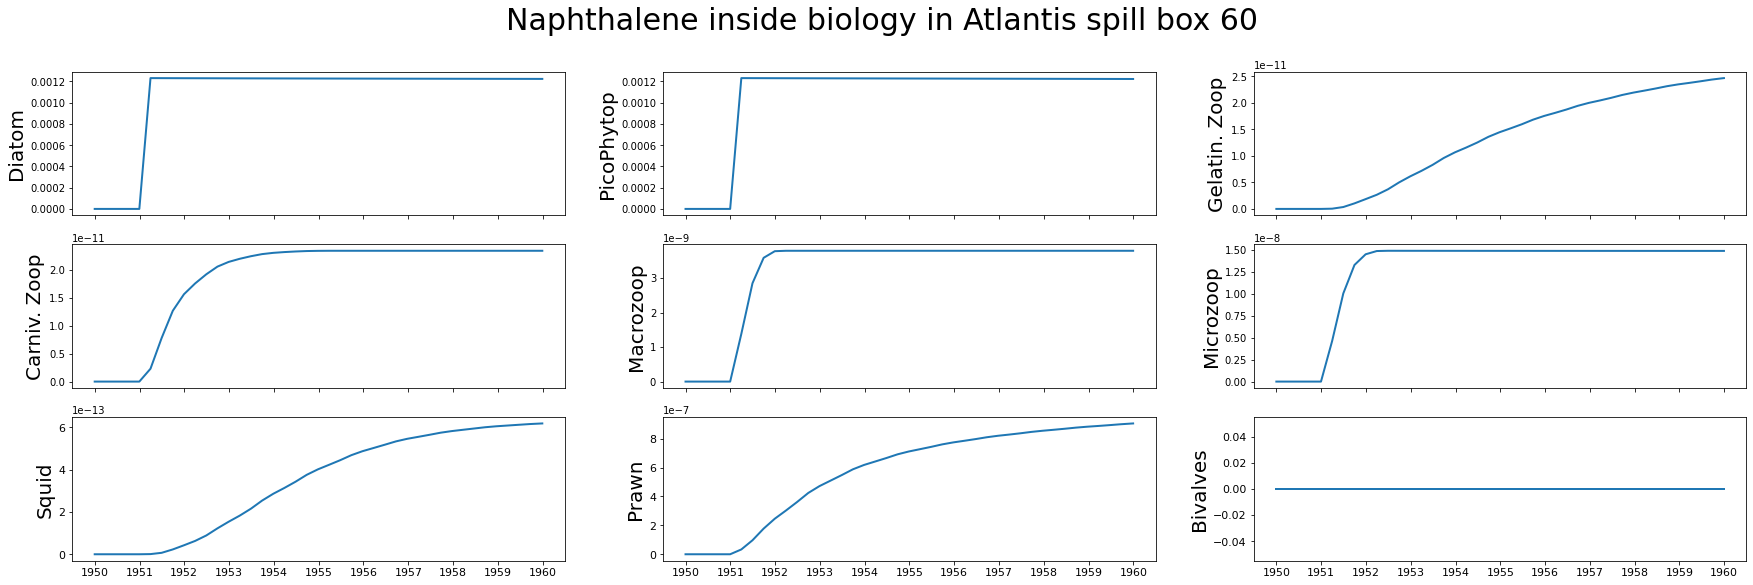

In [11]:
#Other Parameters

parameter = "Naphthalene" #Phenanthrene Pyrene Benzo
box = 60

diatoms = np.ma.filled(data.variables["Diatom_"+parameter][:,box], np.nan)
picos = np.ma.filled(data.variables["PicoPhytopl_"+parameter][:,box], np.nan)
gel_zoo = np.ma.filled(data.variables["Gelat_Zoo_"+parameter][:,box], np.nan)
carn_zoo = np.ma.filled(data.variables["Carniv_Zoo_"+parameter][:,box], np.nan)
macrozoo = np.ma.filled(data.variables["Zoo_"+parameter][:,box], np.nan)
microzoo = np.ma.filled(data.variables["MicroZoo_"+parameter][:,box], np.nan)
squid = np.ma.filled(data.variables["Squid_"+parameter][:,box], np.nan)
prawn = np.ma.filled(data.variables["Prawn_"+parameter][:,box], np.nan)
bivalves = np.ma.filled(data.variables["Bivalves_"+parameter][:,box], np.nan)
#param_control = np.ma.filled(control.variables[parameter][:,box], np.nan)

font_size = 20

fig, ax = plt.subplots(3,3, figsize = (30,9), sharex=True)
fig.suptitle(parameter + ' inside biology in Atlantis spill box ' + str(box), fontsize = 30)

ax[0, 0].plot(oiled_time, diatoms.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[0, 0].set_ylabel('Diatom', fontsize = font_size)
#ax.legend(('with oil', 'without oil'), loc='lower left')

ax[0, 1].plot(oiled_time, picos.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[0, 1].set_ylabel('PicoPhytop', fontsize = font_size)

ax[0, 2].plot(oiled_time, gel_zoo.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[0, 2].set_ylabel('Gelatin. Zoop', fontsize = font_size)

ax[1, 0].plot(oiled_time, carn_zoo.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[1, 0].set_ylabel('Carniv. Zoop', fontsize = font_size)

ax[1, 1].plot(oiled_time, macrozoo.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[1, 1].set_ylabel('Macrozoop', fontsize = font_size)

ax[1, 2].plot(oiled_time, microzoo.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[1, 2].set_ylabel('Microzoop', fontsize = font_size)

ax[2, 0].plot(oiled_time, squid.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[2, 0].set_ylabel('Squid', fontsize = font_size)
ax[2, 0].tick_params(labelsize=label_size)

ax[2, 1].plot(oiled_time, prawn.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax[2, 1].set_ylabel('Prawn', fontsize = font_size)
ax[2, 1].tick_params(labelsize=label_size)

ax[2, 2].plot(oiled_time, bivalves, linewidth = 2) #control_time, param_control, 
ax[2, 2].set_ylabel('Bivalves', fontsize = font_size)
ax[2, 2].tick_params(labelsize=label_size)

#### Age-structured vertebrate species

In [14]:
# Age-structured species
cohorts = {
    'Benthopelagic':10, 'Small_Demersal_fish':10, 'Small_Flatfish':10, 'Small_pelagic_fish':7,
    'Chinook_salmon':5, 'Chum_salmon':5, 'Coho_salmon':5,'Pink_salmon':5, 'Sockeye_salmon':5, 
    'Other_salmonids':8,'Hatchery_Chinook_salmon':3,'Hatchery_Coho_salmon':3,'Hatchery_Sockeye_salmon':3,
    'Dogfish':10,'Ratfish':10,'Rockfish':10,'Sixgill':10,'Hake':10,
    'Harbor_porpoise':10, 'Harbor_seals':10,'Humpback_whales':10,
    'Large_Demersal_fish':10, 'Large_Flatfish' :10,'Lingcod' :10,
    'Orcas_resident':10, 'Orcas_transient':10,
    'Pacific_herring':10,'Pollock':10,'Sandlance':7, 
    'Seabird_gulls':10, 'Seabirds':10,'Sealions':10,'Skates':10,
 }

In [15]:

def total_cohorts_perbox(data, species_name, numCohorts):

    numbers = np.ma.zeros((data.variables[species_name + '1_Nums'].shape),dtype = np.int32)
    structuralN = np.ma.zeros((data.variables[species_name + '1_StructN'].shape),dtype = np.int32)
    reservedN = np.ma.zeros((data.variables[species_name + '1_ResN'].shape),dtype = np.int32)

    for cohort in range (1, numCohorts+1):

        species = species_name + str(cohort)
        
        numbers = numbers + np.ma.filled(data.variables[species + '_Nums'][:,:,:], np.nan)
        structuralN = structuralN + np.ma.filled(data.variables[species +'_StructN'][:,:,:], np.nan)
        reservedN = reservedN + np.ma.filled(data.variables[species +'_ResN'][:,:,:], np.nan)

    numbers = numbers.sum(axis=2)
    structuralN = structuralN.sum(axis=2)
    reservedN = reservedN.sum(axis=2)
    
    return numbers, structuralN, reservedN

def total_boxeslayers(data, control, species):
    
    data_all = np.ma.filled(data.variables[species], np.nan)
    data_all_depths = data_all.sum(axis=2)
    data_all_boxes = data_all_depths.sum(axis=1)
    
    control_all = np.ma.filled(control.variables[species], np.nan)
    control_all_depths = control_all.sum(axis=2)
    control_all_boxes = control_all_depths.sum(axis=1)

    return data_all_boxes, control_all_boxes


def total_perbox(data, control, species, box):
    
    data_per_box = np.ma.filled(data.variables[species][:,box,:], np.nan)
    data_for_box = data_per_box.sum(axis=1)
    
    control_all = np.ma.filled(control.variables[species][:,box,:], np.nan)
    control_for_box = control_all.sum(axis=1)

    return data_for_box, control_for_box


Summing across cohorts

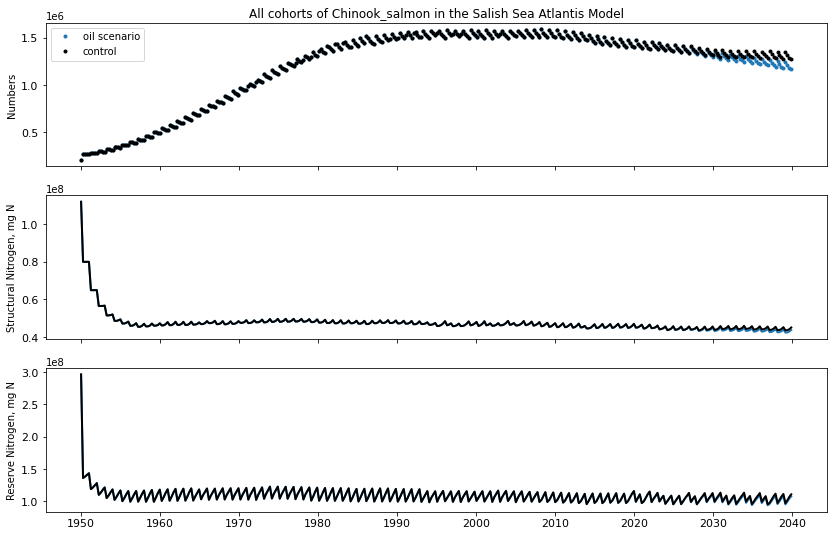

In [16]:
# Exploring species across their cohort

species_name = 'Chinook_salmon'
numCohorts = cohorts[species_name]

numbers_oiled, structralN_oiled, reservedN_oiled = total_cohorts_perbox(data, species_name, numCohorts)
numbers_control, structralN_control, reservedN_control = total_cohorts_perbox(control, species_name, numCohorts)

# Summed across all boxes
fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, numbers_oiled.sum(axis=1), '.',control_time, numbers_control.sum(axis=1), 'k.',linewidth = line_width)
ax[0].set_title('All cohorts of ' + species_name + ' in the Salish Sea Atlantis Model', fontsize = font_size)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=label_size)
ax[0].legend(('oil scenario', 'control'), loc='best')

ax[1].plot(oiled_time, structralN_oiled.sum(axis=1), control_time, structralN_control.sum(axis=1), 'k',linewidth = line_width)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=label_size)

ax[2].plot(oiled_time, reservedN_oiled.sum(axis=1), control_time, reservedN_control.sum(axis=1), 'k',linewidth = line_width)
ax[2].set_ylabel('Reserve Nitrogen, mg N')
ax[2].tick_params(labelsize=label_size)

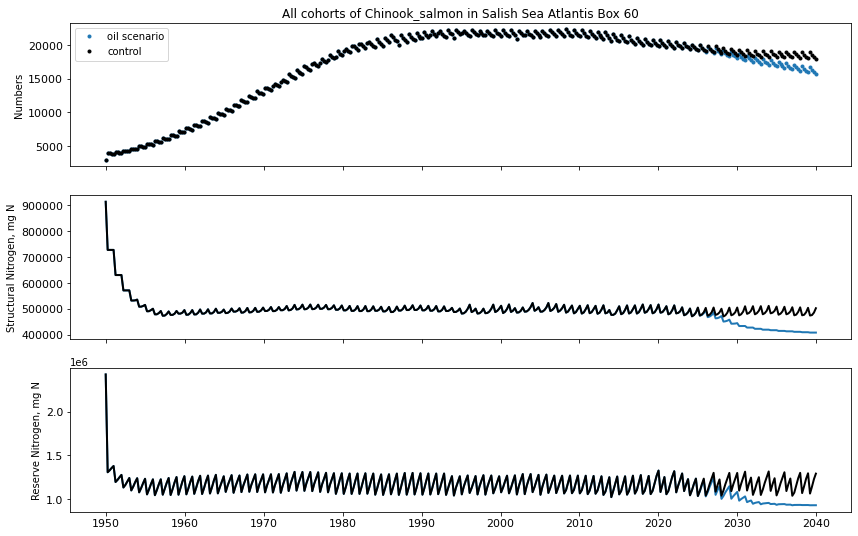

In [17]:
# For a specific box

box = 60

fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, numbers_oiled[:,box], '.',control_time, numbers_control[:,box], 'k.',linewidth = line_width)
ax[0].set_title('All cohorts of ' + species_name + ' in Salish Sea Atlantis Box ' + str(box), fontsize = font_size)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=label_size)
ax[0].legend(('oil scenario', 'control'), loc='best')

ax[1].plot(oiled_time, structralN_oiled[:,box], control_time, structralN_control[:,box], 'k',linewidth = line_width)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=label_size)

ax[2].plot(oiled_time, reservedN_oiled[:,box], control_time, reservedN_control[:,box], 'k',linewidth = line_width)
ax[2].set_ylabel('Reserve Nitrogen, mg N')
ax[2].tick_params(labelsize=label_size)

Exploring individual cohorts

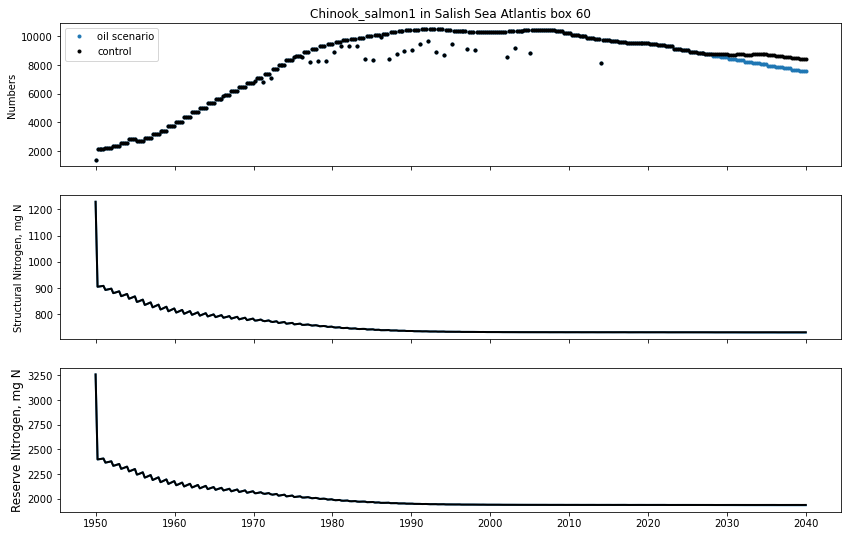

In [18]:
## Use this if you want to explore a specific cohort/species in a specific box

species = 'Chinook_salmon1'
box = 60

oiled_box_num, control_box_num = total_perbox(data, control, species+'_Nums', box)
oiled_box_sN, control_box_sN = total_perbox(data, control, species+'_StructN', box)
oiled_box_rN, control_box_rN = total_perbox(data, control, species+'_ResN', box)

fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, oiled_box_num, '.',control_time, control_box_num, 'k.',linewidth = 2)
ax[0].set_title(species + ' in Salish Sea Atlantis box ' + str(box), fontsize = 12)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=10)
ax[0].legend(('oil scenario', 'control'), loc='best')

ax[1].plot(oiled_time, oiled_box_sN, control_time, control_box_sN, 'k',linewidth = 2)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=10)

ax[2].plot(oiled_time, oiled_box_rN, control_time, control_box_rN, 'k',linewidth = 2)
ax[2].set_ylabel('Reserve Nitrogen, mg N', fontsize = 12)
ax[2].tick_params(labelsize=10);

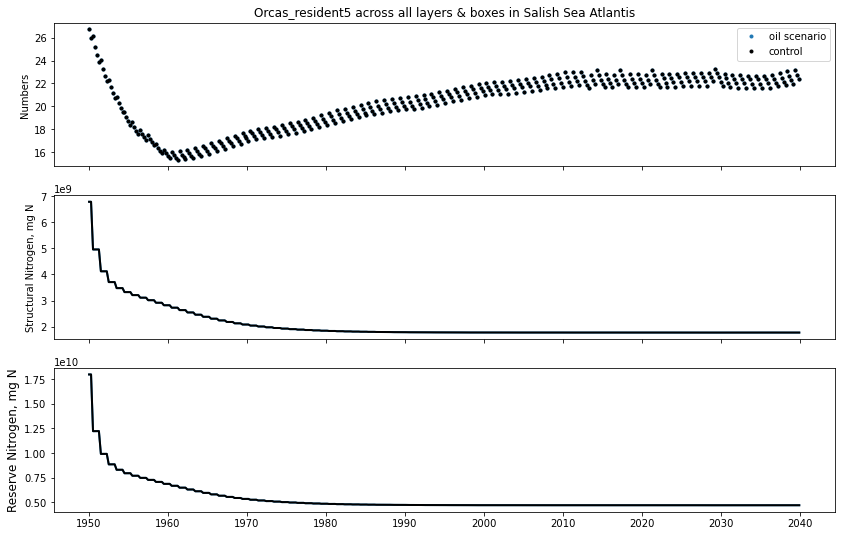

In [26]:
## Use this if you want to explore a specific cohort across all boxes and layers

species_cohort = 'Orcas_resident5'

data_num, control_num = total_boxeslayers(data, control, species_cohort + '_Nums')
data_sN, control_sN = total_boxeslayers(data, control, species_cohort +'_StructN')
data_rN, control_rN = total_boxeslayers(data, control, species_cohort +'_ResN')

fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, data_num, '.',control_time, control_num, 'k.',linewidth = 2)
ax[0].set_title(species_cohort + ' across all layers & boxes in Salish Sea Atlantis', fontsize = 12)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=10)
ax[0].legend(('oil scenario', 'control'), loc='best')

ax[1].plot(oiled_time, data_sN, control_time, control_sN, 'k',linewidth = 2)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=10)

ax[2].plot(oiled_time, data_rN, control_time, control_rN, 'k',linewidth = 2)
ax[2].set_ylabel('Reserve Nitrogen, mg N', fontsize = 12);
ax[2].tick_params(labelsize=10)

### Benthic species without age structure
benthic species: Macroalgae, Benthic_grazer, Bivalves, Crabs, Dungeness_crabs, Filter_feeder, Macrobenthos, Seagrass, Sponges

In [20]:


def plot_benthic_timeseries(data, control, species):
    benthic_oiled = np.ma.filled(data.variables[species + '_N'], np.nan)
    benthic_control = np.ma.filled(control.variables[species + '_N'], np.nan)

    benthic_oiled = benthic_oiled.sum(axis=1)*25
    benthic_control = benthic_control.sum(axis=1)*25

    fig, ax = plt.subplots(figsize = (14,3)) 
    ax.plot(oiled_time, benthic_oiled, '.',control_time, benthic_control, 'k.', linewidth = 2)
    ax.set_title('Benthic ' + species + ' across all boxes in Salish Sea Atlantis', fontsize = font_size)
    ax.set_ylabel('tonnes')
    ax.tick_params(labelsize=label_size)
    ax.legend(('oil scenario', 'control'), loc='best')

    return fig, ax

def plot_benthic_timeseries_perbox(data, control, species, box):
    benthic_oiled = np.ma.filled(data.variables[species + '_N'][:,box], np.nan)
    benthic_control = np.ma.filled(control.variables[species + '_N'][:,box], np.nan)

    fig, ax = plt.subplots(figsize = (14,3))
    ax.plot(oiled_time, benthic_oiled, '.',control_time, benthic_control, 'k.',linewidth = 2)
    ax.set_title('Benthic ' + species + ' in Salish Sea Atlantis box ' + str(box), fontsize = font_size)
    ax.set_ylabel('tonnes')
    ax.tick_params(labelsize=label_size)
    ax.legend(('oil scenario', 'control'), loc='best')

    return fig, ax

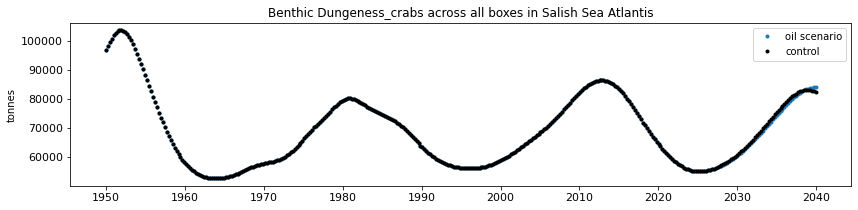

In [21]:
# Across the whole model
species = 'Dungeness_crabs'
plot_benthic_timeseries(data, control, species);

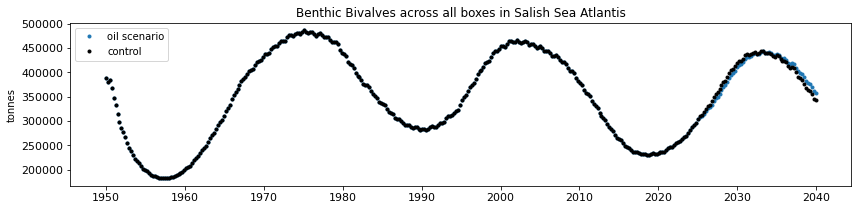

In [22]:
# Across the whole model
species = 'Bivalves'
plot_benthic_timeseries(data, control, species);

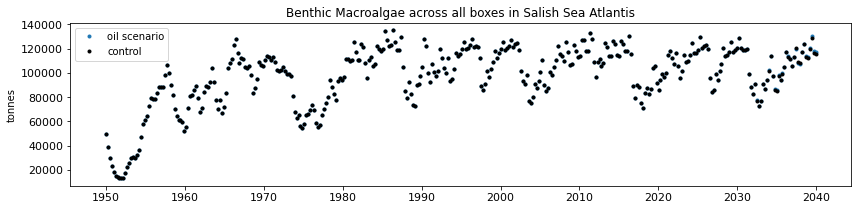

In [23]:
# Across the whole model
species = 'Macroalgae'
plot_benthic_timeseries(data, control, species);

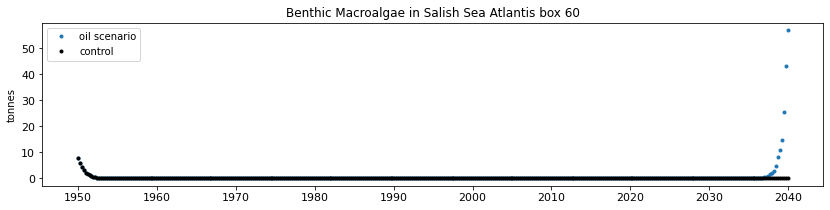

In [24]:
# Within a specific box
species = 'Macroalgae'
box = 60
plot_benthic_timeseries_perbox(data, control, species, box);

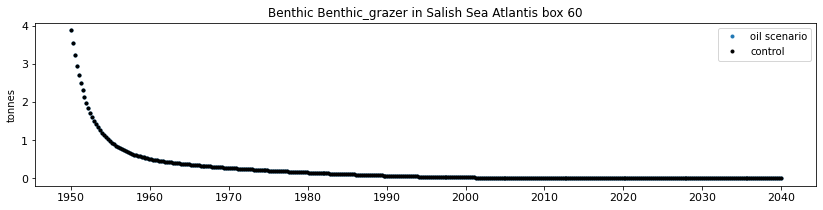

In [25]:
species = 'Benthic_grazer'
box = 60
plot_benthic_timeseries_perbox(data, control, species, box);

## Productivity and Trophic Transfer Efficiency
spatial and temporal plots of productivity & trophic transfer efficiency for comparison with SalishSeaCast

In [16]:
# Reading in Atlantis map

shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)
data_df = data_df.sort_values(by=['BOX_ID'])
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]

# Reading Productivity files & variables
PROD_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control_00SS_Jun1_90y/outputSalishSeaPROD.nc"
PROD = xr.open_dataset(str(PROD_file), decode_cf=True)

PROD_time = np.ma.filled(PROD.variables['t'], np.nan)
tstart = 150 #np.where(PROD_time=='2016-01-01T14:00:00.000000000')[0][0]
tstop = 200 #np.where(PROD_time=='2017-01-01T14:00:00.000000000')[0][0]

microzoo_prod = np.ma.filled(PROD.variables['MicroZooProdn'][tstart:tstop][:], np.nan) #ZS
mesozoo_prod = np.ma.filled(PROD.variables['ZooProdn'][tstart:tstop][:], np.nan) #ZS
carn_zoo_prod = np.ma.filled(PROD.variables['Carniv_ZooProdn'][tstart:tstop][:], np.nan) #ZL
gel_zoo_prod = np.ma.filled(PROD.variables['Gelat_ZooProdn'][tstart:tstop][:], np.nan) #ZG

diatom_prod = np.ma.filled(PROD.variables['DiatomProdn'], np.nan) #PL
pico_prod = np.ma.filled(PROD.variables['PicoPhytoplProdn'], np.nan) #PS

zooplankton_prod = (microzoo_prod + mesozoo_prod + carn_zoo_prod + gel_zoo_prod)*5.7 #converted to mgC m-3 d-1 
phytoplankton_prod = (diatom_prod + pico_prod)*5.7


In [43]:
np.max(phytoplankton_prod)

68.74007885090228

<AxesSubplot:>

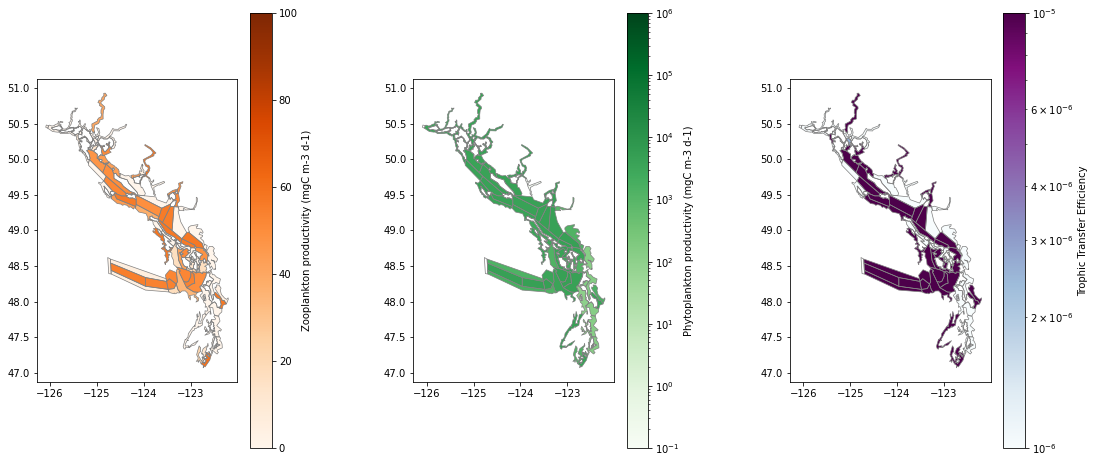

In [53]:
# Spatial Plots
data_df['zoo_prod'] = zooplankton_prod.sum(axis=0)
data_df['phyto_prod'] = phytoplankton_prod.sum(axis=0)
data_df['tte'] = data_df['zoo_prod'] / data_df['phyto_prod']
#data_df.loc[land_boxes, 'zoo_prod'] = 0
#data_df.loc[land_boxes, 'zoo_prod'] = 0

land_df = data_df.loc[land_boxes]
v_min = 0
v_max = 100 #np.max(dVar)

fig = plt.figure(figsize=(18, 8), facecolor='white') #figsize=(9, 12)
gs = plt.GridSpec(1, 3, wspace=0.5, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1],)

ax = fig.add_subplot(gs[0, 0])    
ax = data_df.plot(column = 'zoo_prod', cmap=cm.Oranges, vmin=0, vmax=100, ax=ax,
    legend=True, legend_kwds={'label': 'Zooplankton productivity (mgC m-3 d-1)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white')

ax = fig.add_subplot(gs[0, 1])
ax = data_df.plot(column = 'phyto_prod', cmap=cm.Greens, norm=colors.LogNorm(vmin=1E-1, vmax=1E6), ax=ax,
    legend=True, legend_kwds={'label': 'Phytoplankton productivity (mgC m-3 d-1)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white') 

ax = fig.add_subplot(gs[0, 2])
ax = data_df.plot(column = 'tte', cmap=cm.BuPu, norm=colors.LogNorm(vmin=1E-6, vmax=1E-5), ax=ax,
    legend=True, legend_kwds={'label': 'Trophic Transfer Efficiency'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white') 

#print(num_steps)

